## Graph kernels for detecting change points

Here, I'm using successive perturbations on the links between pocket gophers and chewing lice from Hafner *et al.* to see how well graph kernels can recover the magnitude of the the perturbation.

* [**Disparate rates of molecular evolution in cospeciating hosts and parasites**](http://science.sciencemag.org/content/265/5175/1087), by Hafner MS, Sudman PD, Villablanca FX, Spradling TA, Demastes JW, Nadler SA (doi:10.1126/science.8066445)

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
from SuchTree import SuchTree, SuchLinkedTrees
import graphkernels.kernels as gk
import igraph
import pandas
import seaborn
import json
import pyprind

In [3]:
T1 = SuchTree( '../SuchTree/data/gopher-louse/gopher.tree' )
T2 = SuchTree( '../SuchTree/data/gopher-louse/lice.tree' )
LK = pandas.read_csv( '../SuchTree/data/gopher-louse/links.csv', index_col=0 )
SLT = SuchLinkedTrees( T1, T2, LK )

This is what the graph looks like without perturbations...

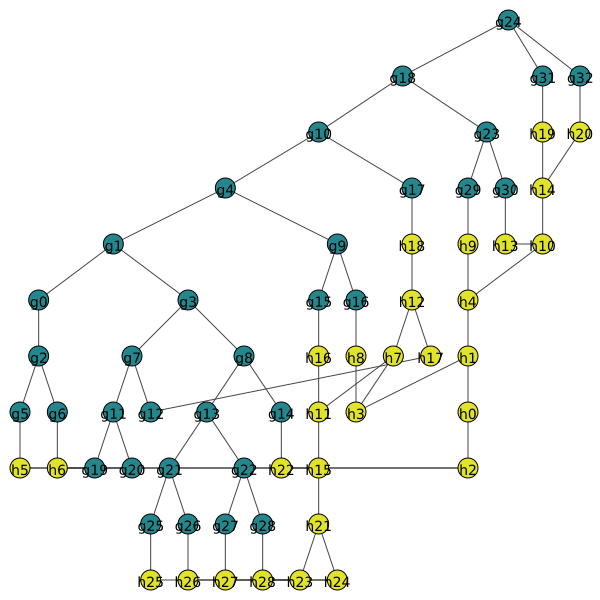

In [10]:
g = SLT.to_igraph( swaps=0 )

igraph.plot( g, layout=g.layout_reingold_tilford() )

...and after 15 host-parasite links have been randomly removed.

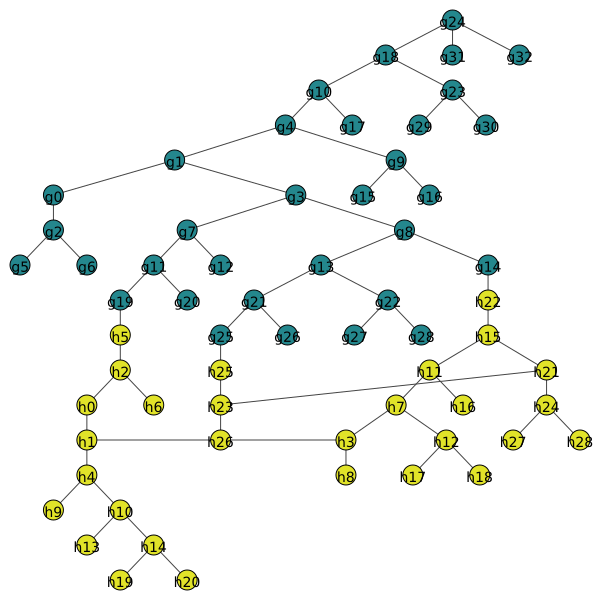

In [34]:
g = SLT.to_igraph( deletions=15 )

igraph.plot( g, layout=g.layout_reingold_tilford() )

The connected graphlet kernel seems to recover the order very well :

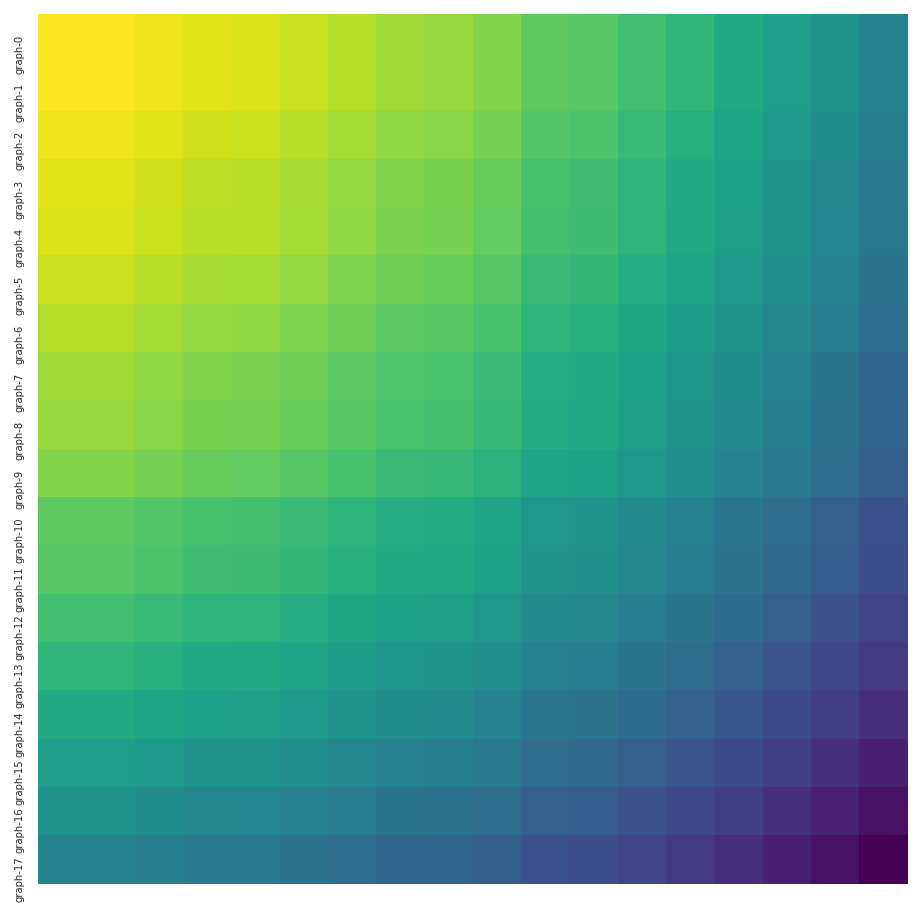

In [55]:
names, graphs = [],[]
for i in range( 0, 18, 1 ) :
    names.append( 'graph-' + str(i) )
    graphs.append( SLT.to_igraph( deletions=i ) )
    
K = gk.CalculateConnectedGraphletKernel( graphs )
figure( figsize=(8,8) )

seaborn.set( font_scale=0.5 )
seaborn.heatmap( K, cmap='viridis',
                    xticklabels=False, yticklabels=names,
                    cbar=False, square=True )

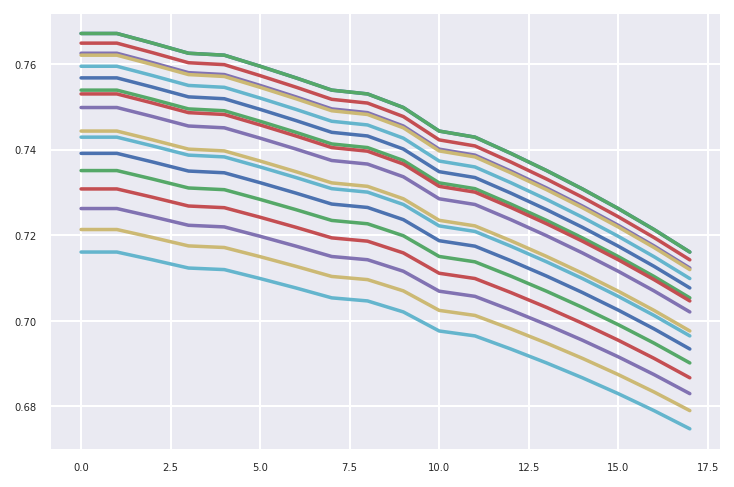

In [65]:
for i in range( 0, 18, 1 ) :
    plot( K[i] )

Adding random links seems to work as well, though it's noisier.

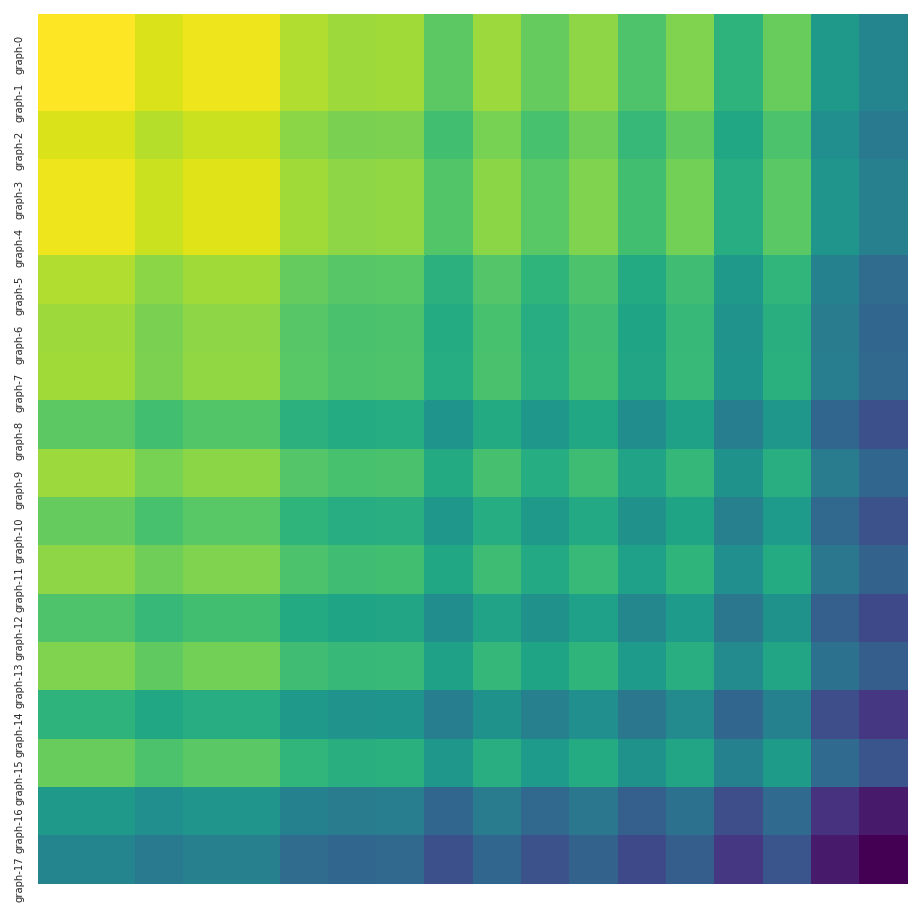

In [66]:
names, graphs = [],[]
for i in range( 0, 18, 1 ) :
    names.append( 'graph-' + str(i) )
    graphs.append( SLT.to_igraph( additions=i ) )

K = gk.CalculateConnectedGraphletKernel( graphs )
figure( figsize=(8,8) )

seaborn.set( font_scale=0.5 )
seaborn.heatmap( K, cmap='viridis',
                    xticklabels=False, yticklabels=names,
                    cbar=False, square=True )

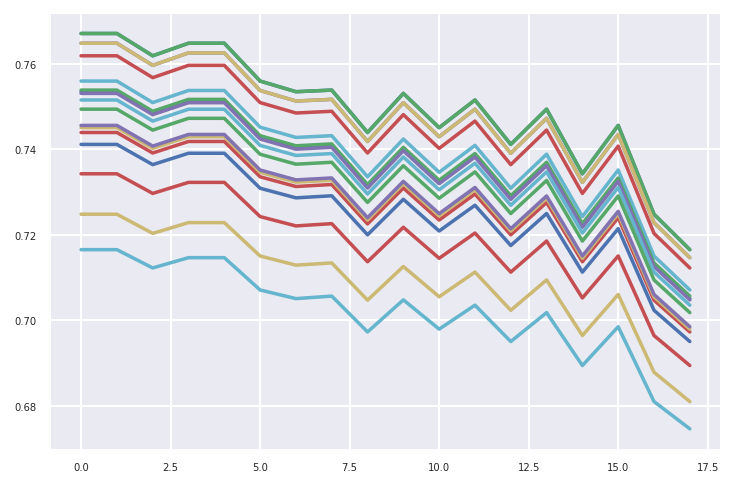

In [67]:
for i in range( 0, 18, 1 ) :
    plot( K[i] )

The connected graphlet kernel doesn't seem very sensitive to permutation of the host-parasite associations, though.

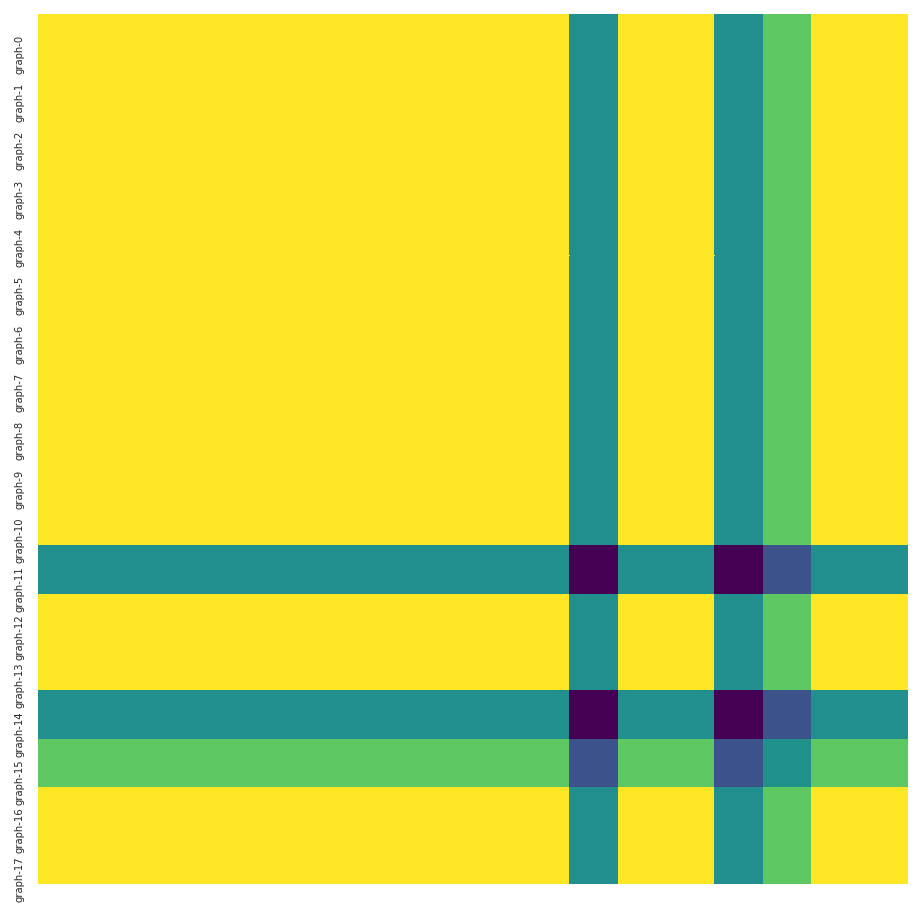

In [69]:
names, graphs = [],[]
for i in range( 0, 18, 1 ) :
    names.append( 'graph-' + str(i) )
    graphs.append( SLT.to_igraph( swaps=i ) )

K = gk.CalculateConnectedGraphletKernel( graphs )
figure( figsize=(8,8) )

seaborn.set( font_scale=0.5 )
seaborn.heatmap( K, cmap='viridis',
                    xticklabels=False, yticklabels=names,
                    cbar=False, square=True )

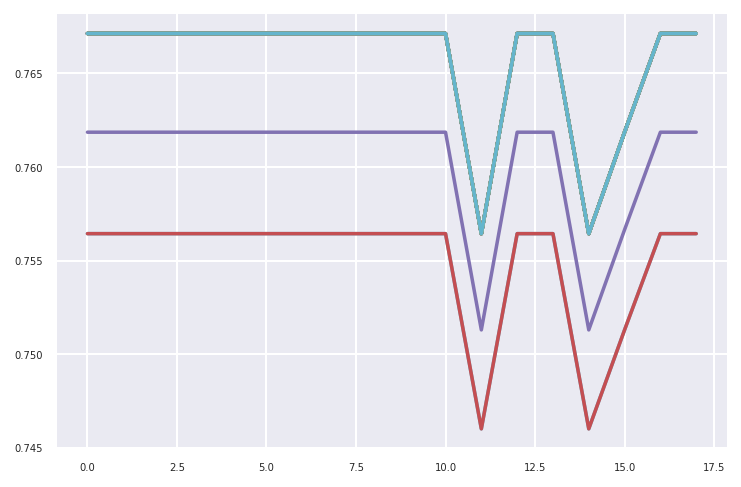

In [70]:
for i in range( 0, 18, 1 ) :
    plot( K[i] )

The Weisfeiler-Lehman subtree kernel seems to pick out something a lot more interesting, though...

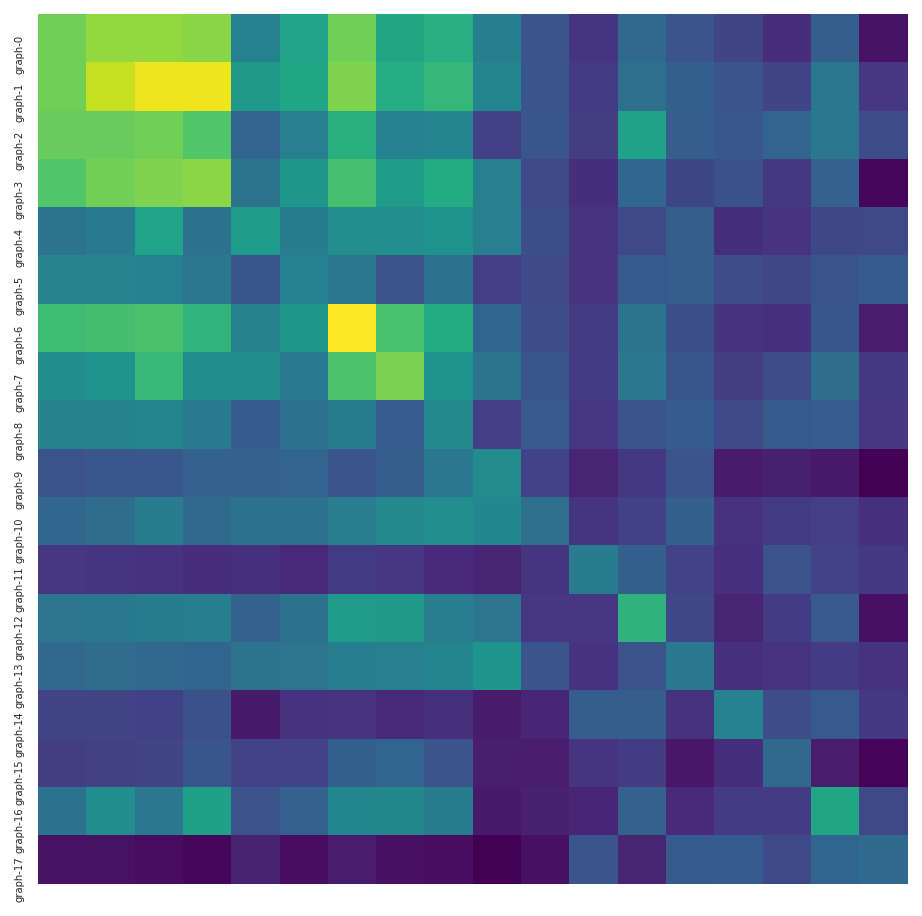

In [12]:
names, graphs = [],[]
for i in range( 0, 18, 1 ) :
    names.append( 'graph-' + str(i) )
    graphs.append( SLT.to_igraph( swaps=i ) )

K = gk.CalculateWLKernel( graphs )
figure( figsize=(8,8) )

seaborn.set( font_scale=0.5 )
seaborn.heatmap( K, cmap='viridis',
                    xticklabels=False, yticklabels=names,
                    cbar=False, square=True )

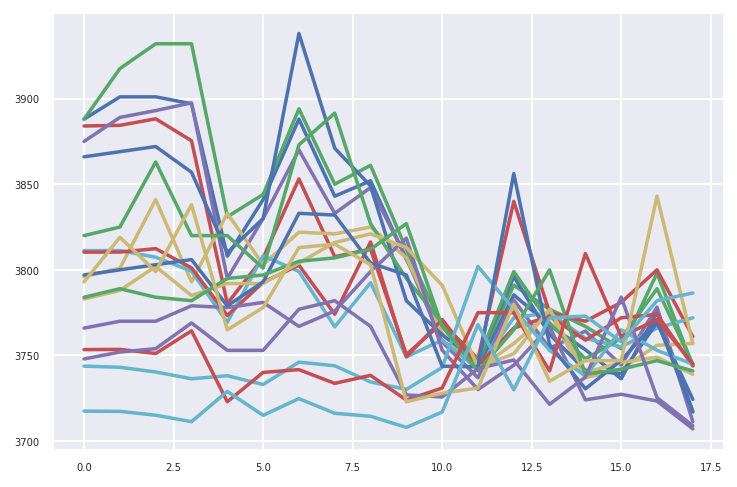

In [13]:
for i in range( 0, 18, 1 ) :
    plot( K[i] )